In [46]:
# Import Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import sklearn.neighbors as ne
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [47]:
file = "heart_failure_clinical_records_dataset 3.csv"  #Read in the csv file.
heart_failure = pd.read_csv(file)   #Created variable "heart_failure" , which references an instance of a DataFrame.
heart_failure.shape
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


0    203
1     96
Name: DEATH_EVENT, dtype: int64


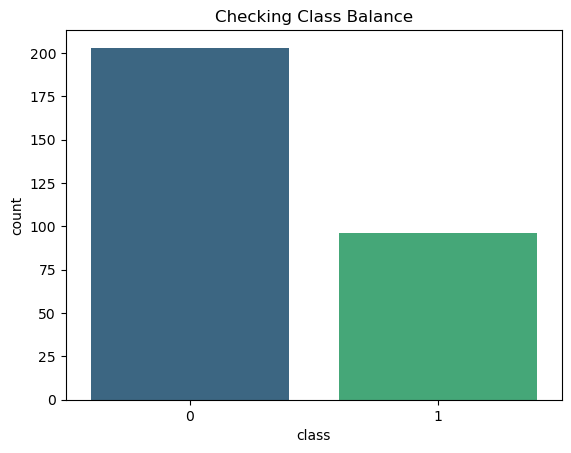

In [48]:
# Check Class balance

each_class_count = heart_failure['DEATH_EVENT'].value_counts()
print (each_class_count)

plt.figure()
sns.barplot(x=each_class_count.index, y=each_class_count.values, palette='viridis')

plt.title('Checking Class Balance')
plt.xlabel('class')
plt.ylabel('count')

plt.show()

# PRE-PROCESSING OF THE DATA

In [49]:
# Assign X features to X and Target to y

X = heart_failure.drop(columns =['DEATH_EVENT'], axis=1)
y = heart_failure['DEATH_EVENT']


# STANDARDIZING THE DATA SO AS THEY HAVE EQUAL CONTRIBUTION TO THE MODEL

# Fit scaler on Random Under Sampling data
norm = MinMaxScaler().fit(X)
# Transform training data
X_norm = norm.transform(X)

X_norm = pd.DataFrame(norm.transform(X), columns=X.columns)



In [50]:
from imblearn.over_sampling import SMOTE
# Importing dataset, Pot Class Imbalance and prepare for Over/Under-sampling

smote = SMOTE()
# Apply class balancing
features, target = smote.fit_resample(X_norm, y)

print('After the Smoth sampling: ')
print('Class No ', (target == 0).sum())
print('Class Yes ', (target == 1).sum())

After the Smoth sampling: 
Class No  203
Class Yes  203


In [51]:
new_heart_failure = pd.concat([features, pd.Series(target, name='DEATH_EVENT')], axis=1)

In [52]:
new_heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.000000,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1
1,0.272727,0.000000,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1
2,0.454545,0.000000,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1
3,0.181818,1.000000,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1
4,0.454545,1.000000,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.082687,1.000000,0.046948,1.0,0.272501,0.0,0.162925,0.118514,0.475160,0.0,0.0,0.141525,1
402,0.635631,0.991938,0.007915,0.0,0.361438,1.0,0.414664,0.391293,0.514977,1.0,1.0,0.021955,1
403,0.476563,0.000000,0.017848,0.0,0.195371,0.0,0.181767,0.099938,0.666185,0.0,0.0,0.410766,1
404,0.565365,0.000000,0.024792,0.0,0.417027,0.0,0.416524,0.202781,0.671974,1.0,0.0,0.126233,1


In [53]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.2, random_state=1)

#checking the shape of the different test and train parameters

print('The shape of X_train is:', X_train.shape)
print('The shape of X_test is:', X_test.shape)
print('The shape of y_train is:', y_train.shape)
print('The shape of y_test is:', y_test.shape)


The shape of X_train is: (324, 12)
The shape of X_test is: (82, 12)
The shape of y_train is: (324,)
The shape of y_test is: (82,)


# Machine Learning Classification Algorithms

In [54]:
# Random Forest classifier on original data
import sklearn.ensemble as rf
max_depth = 10
RF =rf.RandomForestClassifier(max_depth=3, random_state=1)
RF.fit(X_train,y_train)
ACC_train=RF.score(X_train,y_train)
ACC_test=RF.score(X_test,y_test)
print('RF Train Accuracy=', ACC_train)
print('RF Test Accuracy=', ACC_test)
print('=================================================')

# DT classifier on original data
import sklearn.tree as dt
max_depth = 10
DT =dt.DecisionTreeClassifier(max_depth=3, random_state=1)
DT.fit(X_train,y_train)
ACC_train=DT.score(X_train,y_train)
ACC_test=DT.score(X_test,y_test)
print('DT Train Accuracy=', ACC_train)
print('DT Test Accuracy=', ACC_test)
print('=================================================')

# Support Vector Machine classifier on original data
import sklearn.svm as svm
SVM =svm.SVC(random_state=1)
SVM.fit(X_train,y_train)
ACC_train=SVM.score(X_train,y_train)
ACC_test=SVM.score(X_test,y_test)
print('SVM Train Accuracy=', ACC_train)
print('SVM Test Accuracy=', ACC_test)
print('=================================================')

# Logistic Regression classifier on original data
import sklearn.linear_model as lm
LR =lm.LogisticRegression(random_state=1)
LR.fit(X_train,y_train)
ACC_train=LR.score(X_train,y_train)
ACC_test=LR.score(X_test,y_test)
print('LR Train Accuracy=', ACC_train)
print('LR Test Accuracy=', ACC_test)
print('=================================================')

# KNN classifier on original data
import sklearn.neighbors as ne
KNN=ne.KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
ACC_train=KNN.score(X_train,y_train)
ACC_test=KNN.score(X_test,y_test)
print('KNN Train Accuracy=', ACC_train)
print('KNN Test Accuracy=', ACC_test)

RF Train Accuracy= 0.9166666666666666
RF Test Accuracy= 0.8902439024390244
DT Train Accuracy= 0.8672839506172839
DT Test Accuracy= 0.8658536585365854
SVM Train Accuracy= 0.8734567901234568
SVM Test Accuracy= 0.8048780487804879
LR Train Accuracy= 0.7962962962962963
LR Test Accuracy= 0.7926829268292683
KNN Train Accuracy= 0.8858024691358025
KNN Test Accuracy= 0.7439024390243902


<Figure size 50x50 with 0 Axes>

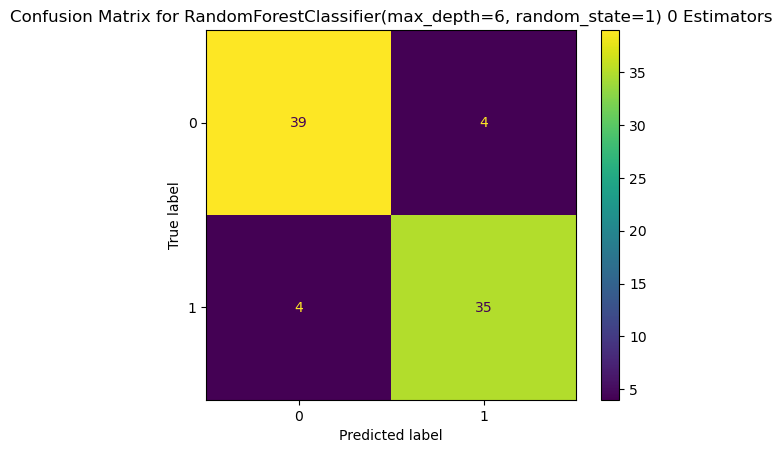

<Figure size 50x50 with 0 Axes>

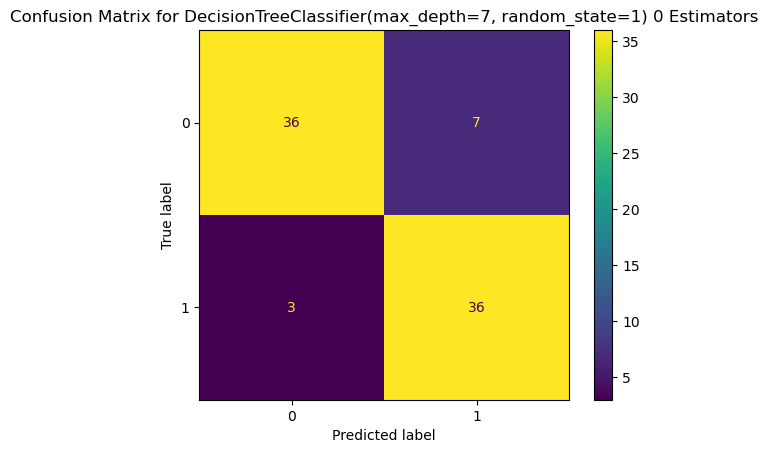

<Figure size 50x50 with 0 Axes>

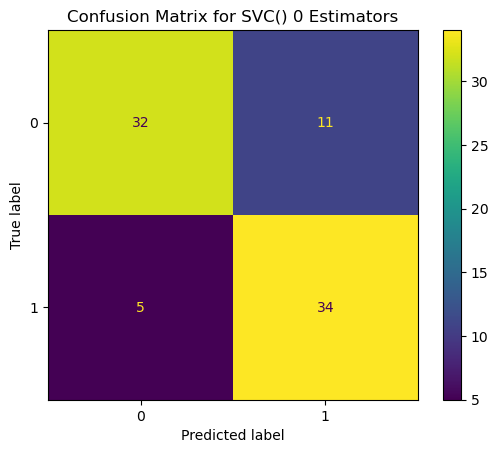

<Figure size 50x50 with 0 Axes>

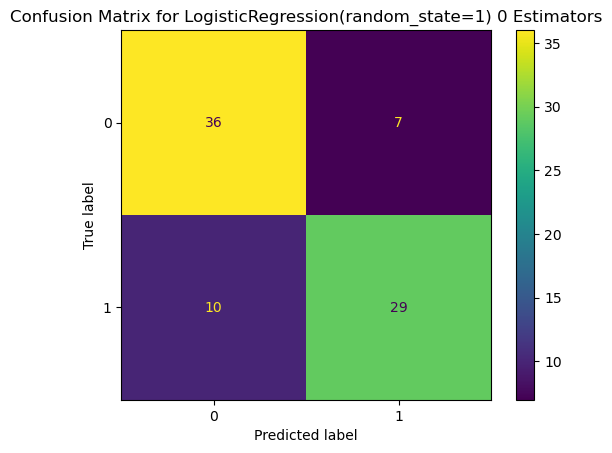

<Figure size 50x50 with 0 Axes>

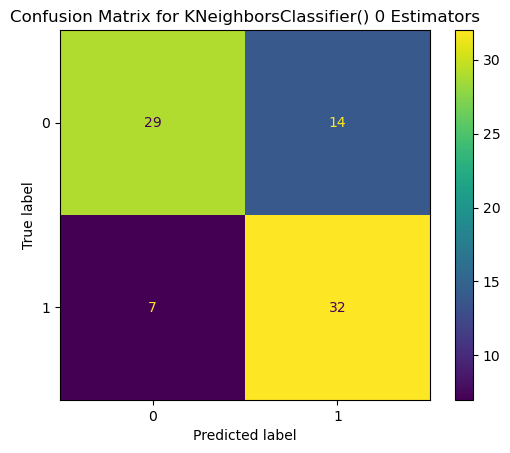

                     accuracy  precision    recall  f1_score
Random Forest        0.902439   0.897436  0.897436  0.897436
Decision Tree        0.878049   0.837209  0.923077  0.878049
SVM                  0.804878   0.755556  0.871795  0.809524
Logistic Regression  0.792683   0.805556  0.743590  0.773333
KNN                  0.743902   0.695652  0.820513  0.752941


In [55]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

# ------  Modeling ------
models = {
    'Random Forest': RandomForestClassifier(max_depth=6, random_state=1),
    'Decision Tree': DecisionTreeClassifier(max_depth=7, random_state=1),
    'SVM': SVC(C=1.0, kernel='rbf', gamma='scale', degree=3, class_weight=None, probability=False), 
    'Logistic Regression': LogisticRegression(random_state=1),    
    'KNN': KNeighborsClassifier(n_neighbors=5)
}
# Define a range of values for the number of estimators (trees) in the Random Forest
num_estimators = range(1)

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    target_pred = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, target_pred),
        'precision': precision_score(y_test, target_pred),
        'recall': recall_score(y_test, target_pred),
        'f1_score': f1_score(y_test, target_pred)
    }

    for n in num_estimators:
        # Calculate the confusion matrix
        conf_matrix = metrics.confusion_matrix(y_test, target_pred)

        # Plot the confusion matrix
        plt.figure(figsize=(0.5, 0.5))  
        conf_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
        conf_matrix_display.plot()
        plt.title(f'Confusion Matrix for {model} {n} Estimators')
        plt.show()
        print('=================================================')

# ------  Results Visualization ------ (adjust as needed)
print(pd.DataFrame(results).T) 

# PERFORMING FEATURE REDUCTION USING PCA WITH 4 COMPONENT

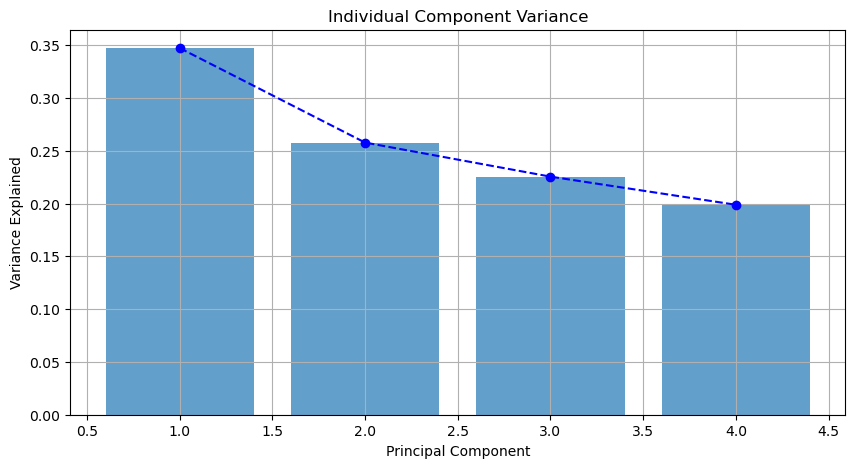

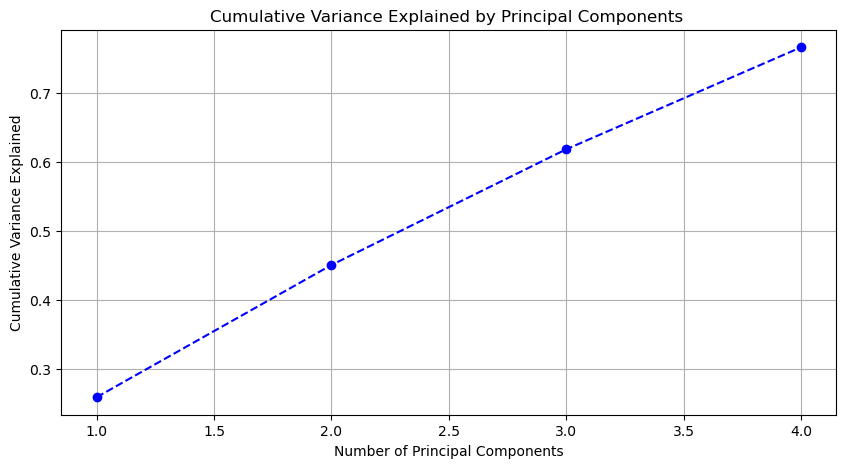

In [56]:
# Apply PCA(4 Component)
pca = PCA(n_components=4)


X_pca = pca.fit_transform(features)
# Individual component variance
individual_variance = pca.explained_variance_

# Cumulative variance explained by each component
cumulative_variance_ratio_ = np.cumsum(pca.explained_variance_ratio_)

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), individual_variance, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Individual Component Variance')
plt.grid(True)
plt.show()

#Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), cumulative_variance_ratio_, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components ')
plt.grid(True)
plt.show()

# #Xtest_pca = pca.transform(X_test)

# #------------------------------------

<Figure size 50x50 with 0 Axes>

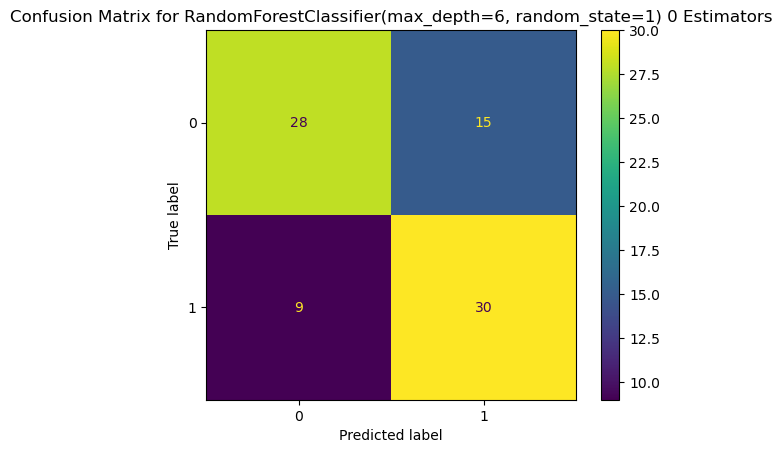

<Figure size 50x50 with 0 Axes>

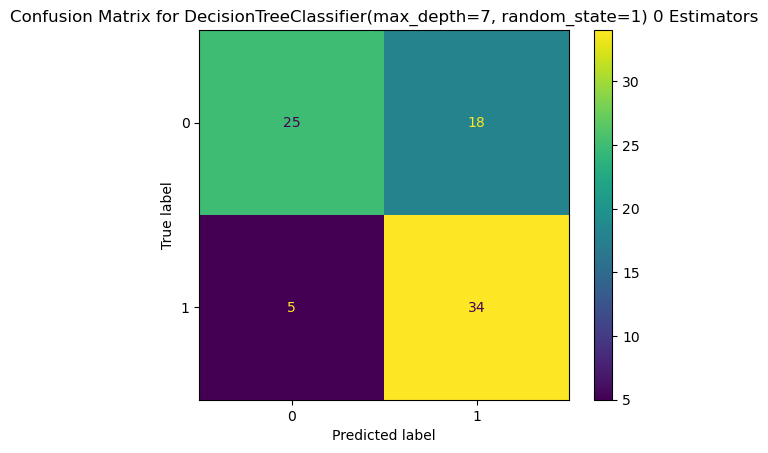

<Figure size 50x50 with 0 Axes>

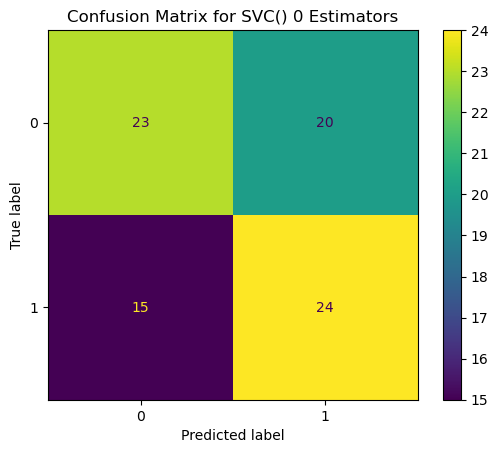

<Figure size 50x50 with 0 Axes>

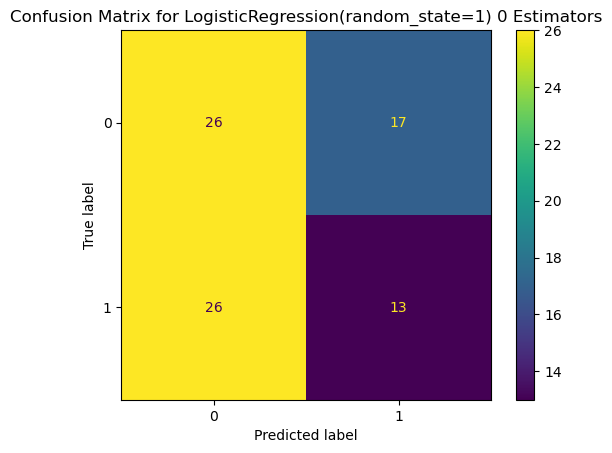

<Figure size 50x50 with 0 Axes>

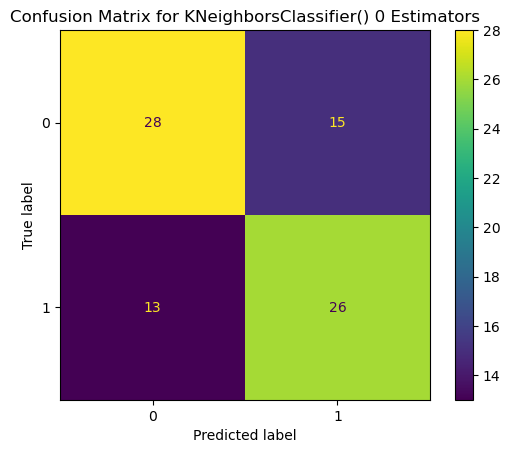

                     accuracy  precision    recall  f1_score
Random Forest        0.707317   0.666667  0.769231  0.714286
Decision Tree        0.719512   0.653846  0.871795  0.747253
SVM                  0.573171   0.545455  0.615385  0.578313
Logistic Regression  0.475610   0.433333  0.333333  0.376812
KNN                  0.658537   0.634146  0.666667  0.650000


In [57]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=1)

# ------  Modeling ------
models = {
    'Random Forest': RandomForestClassifier(max_depth=6, random_state=1),
    'Decision Tree': DecisionTreeClassifier(max_depth=7, random_state=1),
    'SVM': SVC(C=1.0, kernel='rbf', gamma='scale', degree=3, class_weight=None, probability=False), 
    'Logistic Regression': LogisticRegression(random_state=1),    
    'KNN': KNeighborsClassifier(n_neighbors=5)
}
# Define a range of values for the number of estimators (trees) in the Random Forest
num_estimators = range(1)

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    target_pred = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, target_pred),
        'precision': precision_score(y_test, target_pred),
        'recall': recall_score(y_test, target_pred),
        'f1_score': f1_score(y_test, target_pred)
    }

    for n in num_estimators:
        # Calculate the confusion matrix
        conf_matrix = metrics.confusion_matrix(y_test, target_pred)

        # Plot the confusion matrix
        plt.figure(figsize=(0.5, 0.5))  
        conf_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
        conf_matrix_display.plot()
        plt.title(f'Confusion Matrix for {model} {n} Estimators')
        plt.show()
        print('=================================================')

# ------  Results Visualization ------ (adjust as needed)
print(pd.DataFrame(results).T) 

# Corrolation matrix

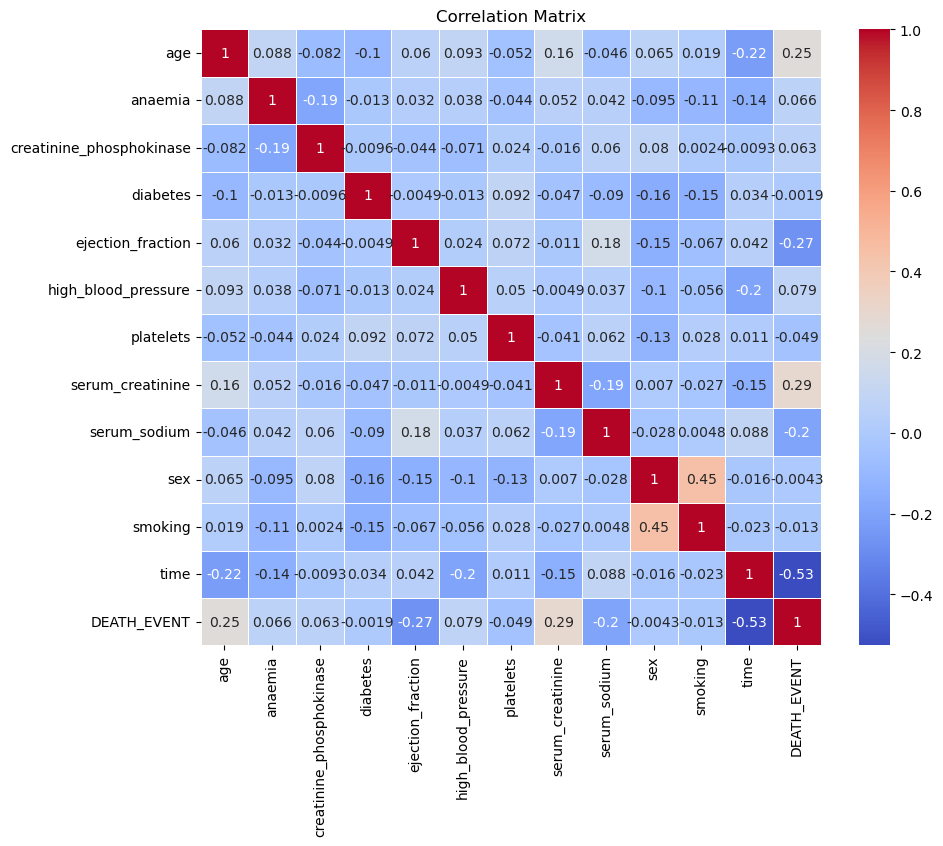

In [58]:
# Calculate the correlation matrix
correlation_matrix = heart_failure.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

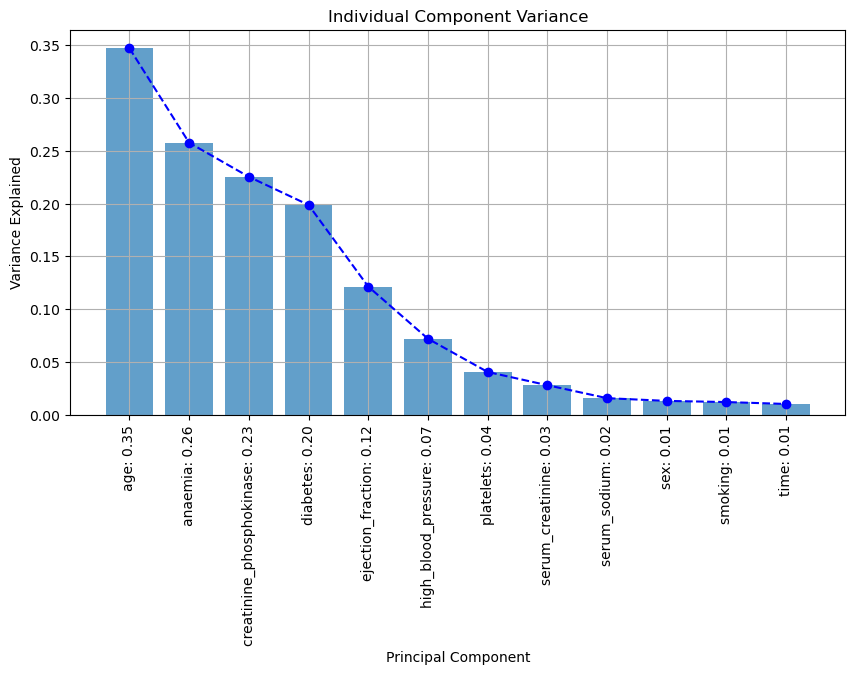

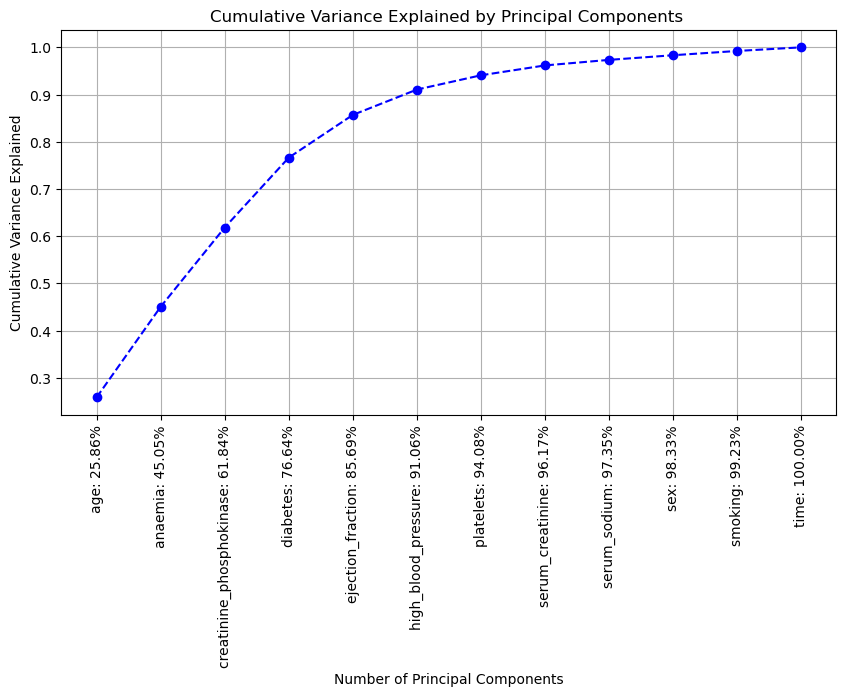

In [59]:
# Apply PCA(12 Component)
pca = PCA(n_components=12)


X_pca = pca.fit_transform(features)
# Individual component variance
individual_variance = pca.explained_variance_

# Cumulative variance explained by each component
cumulative_variance_ratio_ = np.cumsum(pca.explained_variance_ratio_)

# Getting the names of the original features
names_of_features = features.columns

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), individual_variance, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Individual Component Variance')
plt.xticks(range(1, len(individual_variance) + 1),[f"{names_of_features[i]}: {individual_variance[i]:.2f}" for i in range(len(individual_variance))], rotation=90)
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), cumulative_variance_ratio_, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components ')
plt.xticks(range(1, len(cumulative_variance_ratio_) + 1),[f"{names_of_features[i]}: {cumulative_variance_ratio_[i] * 100:.2f}%" for i in range(len(cumulative_variance_ratio_))], rotation=90)
plt.grid(True)
plt.show()

#Xtest_pca = pca.transform(X_test)

#------------------------------------

# SPLITTING, TESTING AND TRAINING WITHOUT SMOTE

In [60]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

#checking the shape of the different test and train parameters

print('The shape of X_train is:', X_train.shape)
print('The shape of X_test is:', X_test.shape)
print('The shape of y_train is:', y_train.shape)
print('The shape of y_test is:', y_test.shape)

The shape of X_train is: (239, 12)
The shape of X_test is: (60, 12)
The shape of y_train is: (239,)
The shape of y_test is: (60,)


<Figure size 50x50 with 0 Axes>

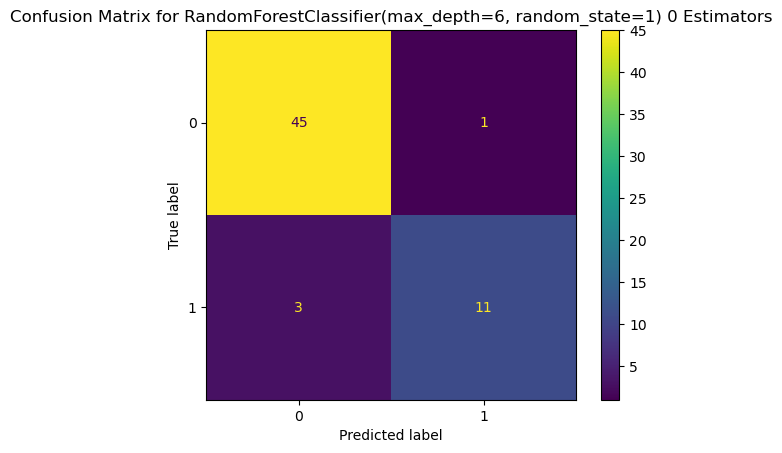

<Figure size 50x50 with 0 Axes>

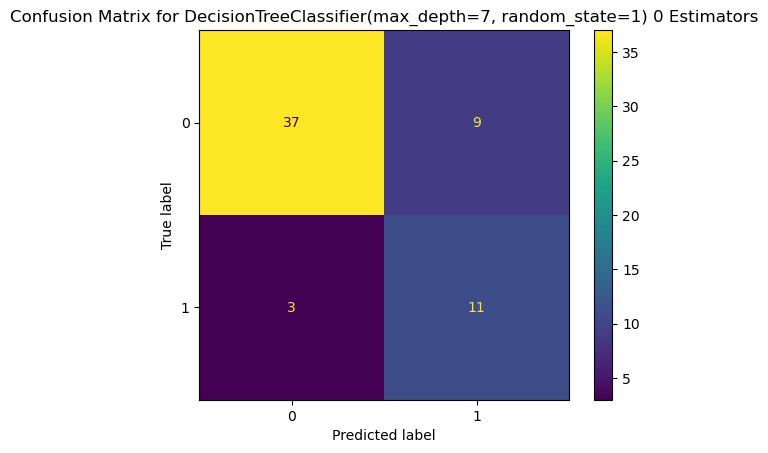

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 50x50 with 0 Axes>

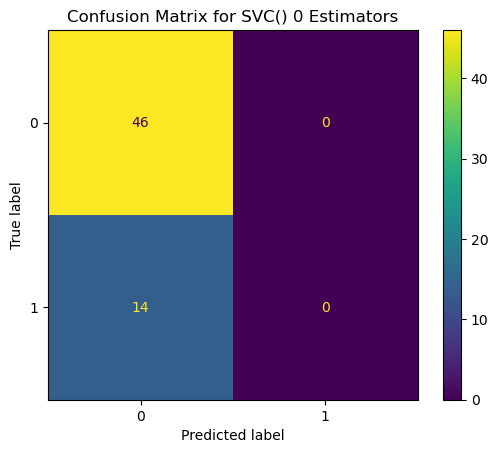

<Figure size 50x50 with 0 Axes>

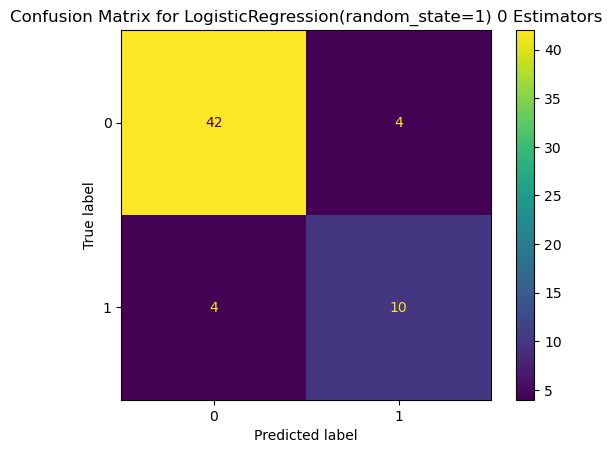

<Figure size 50x50 with 0 Axes>

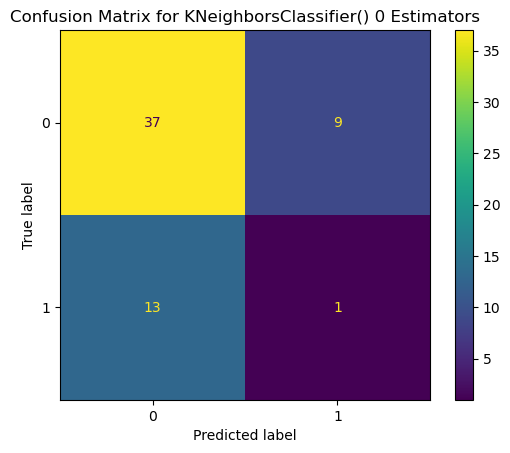

                     accuracy  precision    recall  f1_score
Random Forest        0.933333   0.916667  0.785714  0.846154
Decision Tree        0.800000   0.550000  0.785714  0.647059
SVM                  0.766667   0.000000  0.000000  0.000000
Logistic Regression  0.866667   0.714286  0.714286  0.714286
KNN                  0.633333   0.100000  0.071429  0.083333


In [61]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# ------  Modeling ------
models = {
    'Random Forest': RandomForestClassifier(max_depth=6, random_state=1),
    'Decision Tree': DecisionTreeClassifier(max_depth=7, random_state=1),
    'SVM': SVC(C=1.0, kernel='rbf', gamma='scale', degree=3, class_weight=None, probability=False), 
    'Logistic Regression': LogisticRegression(random_state=1),    
    'KNN': KNeighborsClassifier(n_neighbors=5)
}
# Define a range of values for the number of estimators (trees) in the Random Forest
num_estimators = range(1)

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    target_pred = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, target_pred),
        'precision': precision_score(y_test, target_pred),
        'recall': recall_score(y_test, target_pred),
        'f1_score': f1_score(y_test, target_pred)
    }

    for n in num_estimators:
        # Calculate the confusion matrix
        conf_matrix = metrics.confusion_matrix(y_test, target_pred)

        # Plot the confusion matrix
        plt.figure(figsize=(0.5, 0.5))  
        conf_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
        conf_matrix_display.plot()
        plt.title(f'Confusion Matrix for {model} {n} Estimators')
        plt.show()
        print('=================================================')

# ------  Results Visualization ------ (adjust as needed)
print(pd.DataFrame(results).T) 